In [1]:
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt

import gym
from gym import logger

import matching_bandit
from matching_bandit.utils.p_dist import centered_equal_distance, origin_equal_distance, equal_distance, linear_spaced
from matching_bandit.utils.p_dist import uncentered_equal_distance
from matching_bandit.utils.bandit_sim import matching_selection_sim
from matching_bandit.agents.escb import ESCB
from matching_bandit.agents.simple_adaptive_matching import MDC
logger.set_level(logger.INFO)

## 1. `origin_equal_distance`: `SIMPLE-ADAPTIVE-MATCHING`

Regret upper bound:
$$
\mathbb{E}[R(T)] \leq 640 \frac{N(\log (N)+2)}{\Delta_{\min }} \log (T)+N^{3}
$$
where
$\Delta_{\min }=\min _{i \in[N-1]}\left\{\left(u_{2 i-1}-u_{2 i+2}\right)\left(u_{2 i}-u_{2 i+1}\right)\right\}$

### parameter setting

$u=[0, 0,\tilde{\Delta}, 2\tilde{\Delta}, \dots, (N-1)\tilde{\Delta}]$

INFO: Making new env: MatchingSelectionBandit-v0 ({'n_pairs': 4, 'time_series_frequency': 20000})
INFO: Bernoulli parameters: [0.  0.  0.1 0.1 0.2 0.2 0.3 0.3]
INFO: ========== Repetition: 1 ==========
INFO: Bernoulli parameters: [0.  0.  0.1 0.1 0.2 0.2 0.3 0.3]
INFO: Algorithm: MDC
INFO: Step: 20000, Cumulative Regret: 1142.8799999999583
INFO: Step: 40000, Cumulative Regret: 2285.7499999994593
INFO: Step: 60000, Cumulative Regret: 3428.6100000010183
INFO: Step: 80000, Cumulative Regret: 4571.5000000025775
INFO: Step: 100000, Cumulative Regret: 5714.370000004136
INFO: Step: 120000, Cumulative Regret: 6857.190000005696
INFO: Step: 140000, Cumulative Regret: 8000.000000007255
INFO: Step: 160000, Cumulative Regret: 9142.880000006651
INFO: Step: 180000, Cumulative Regret: 10285.750000005612
INFO: Step: 200000, Cumulative Regret: 11428.610000004572
INFO: ========== Repetition: 2 ==========
INFO: Bernoulli parameters: [0.  0.  0.1 0.1 0.2 0.2 0.3 0.3]
INFO: Algorithm: MDC
INFO: Step: 20000,

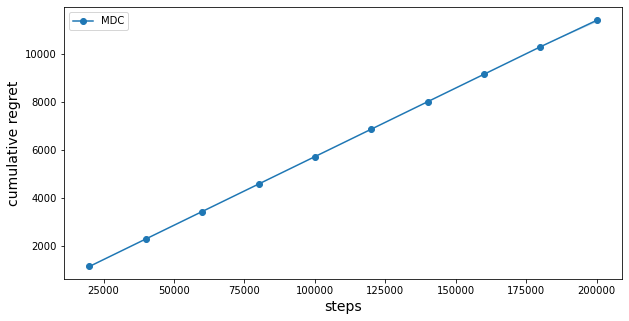

{'mean': {'MDC': array([ 1142.88      ,  2285.75      ,  3428.61      ,  4571.5       ,
        5714.37      ,  6857.19000001,  8000.00000001,  9142.88000001,
       10285.75000001, 11386.06850001])}, 'low': {'MDC': array([ 1142.88      ,  2285.75      ,  3428.61      ,  4571.5       ,
        5714.37      ,  6857.19000001,  8000.00000001,  9142.88000001,
       10285.75000001, 11301.95650001])}, 'high': {'MDC': array([ 1142.88      ,  2285.75      ,  3428.61      ,  4571.5       ,
        5714.37      ,  6857.19000001,  8000.00000001,  9142.88000001,
       10285.75000001, 11428.61      ])}}
INFO: Making new env: MatchingSelectionBandit-v0 ({'n_pairs': 3, 'time_series_frequency': 20000})
INFO: Bernoulli parameters: [0.  0.  0.1 0.1 0.2 0.2]
INFO: ========== Repetition: 1 ==========
INFO: Bernoulli parameters: [0.  0.  0.1 0.1 0.2 0.2]
INFO: Algorithm: MDC
INFO: Step: 20000, Cumulative Regret: 479.9999999998052
INFO: Step: 40000, Cumulative Regret: 959.9999999993687
INFO: Step: 60000, 

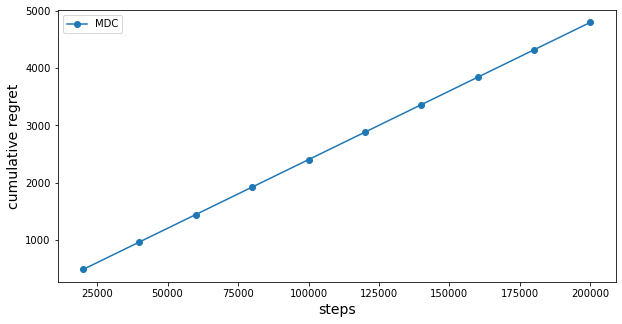

{'mean': {'MDC': array([ 480.        ,  960.        , 1440.        , 1920.        ,
       2400.        , 2880.        , 3360.00000001, 3840.00000001,
       4320.00000001, 4800.00000001])}, 'low': {'MDC': array([ 480.        ,  960.        , 1440.        , 1920.        ,
       2400.        , 2880.        , 3360.00000001, 3840.00000001,
       4320.00000001, 4800.00000001])}, 'high': {'MDC': array([ 480.        ,  960.        , 1440.        , 1920.        ,
       2400.        , 2880.        , 3360.00000001, 3840.00000001,
       4320.00000001, 4800.00000001])}}
INFO: Making new env: MatchingSelectionBandit-v0 ({'n_pairs': 2, 'time_series_frequency': 20000})
INFO: Bernoulli parameters: [0.  0.  0.1 0.1]
INFO: ========== Repetition: 1 ==========
INFO: Bernoulli parameters: [0.  0.  0.1 0.1]
INFO: Algorithm: MDC
INFO: Step: 20000, Cumulative Regret: 133.3400000000237
INFO: Step: 40000, Cumulative Regret: 266.6699999999025
INFO: Step: 60000, Cumulative Regret: 399.9999999997812
INFO: Ste

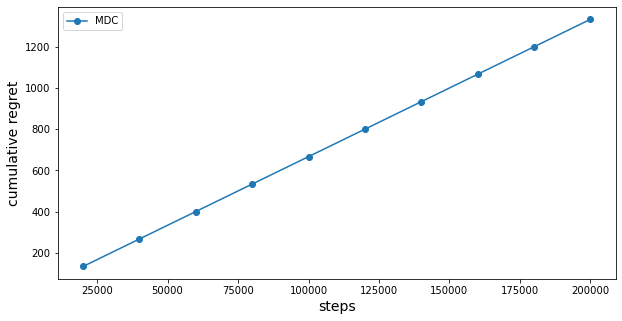

{'mean': {'MDC': array([ 133.34,  266.67,  400.  ,  533.34,  666.67,  800.  ,  933.34,
       1066.67, 1200.  , 1333.34])}, 'low': {'MDC': array([ 133.34,  266.67,  400.  ,  533.34,  666.67,  800.  ,  933.34,
       1066.67, 1200.  , 1333.34])}, 'high': {'MDC': array([ 133.34,  266.67,  400.  ,  533.34,  666.67,  800.  ,  933.34,
       1066.67, 1200.  , 1333.34])}}
------------- Escaped time is 3226.9919986724854 seconds -------------


In [2]:
Ns = [4, 3, 2]
Delta = 0.1
horizon = 200000
reps = 20

t = time.time()
for N in Ns:
    p_dist = origin_equal_distance(N, Delta) 
    agents = [MDC(n_pairs=N)]
    results = matching_selection_sim(agents, p_dist, horizon, reps)
    print(results)
        
print('------------- Escaped time is {0} seconds -------------'.format(time.time() - t))

INFO: Making new env: MatchingSelectionBandit-v0 ({'n_pairs': 11, 'time_series_frequency': 20000})
INFO: Bernoulli parameters: [0.  0.  0.1 0.1 0.2 0.2 0.3 0.3 0.4 0.4 0.5 0.5 0.6 0.6 0.7 0.7 0.8 0.8
 0.9 0.9 1.  1. ]
INFO: ========== Repetition: 1 ==========
INFO: Bernoulli parameters: [0.  0.  0.1 0.1 0.2 0.2 0.3 0.3 0.4 0.4 0.5 0.5 0.6 0.6 0.7 0.7 0.8 0.8
 0.9 0.9 1.  1. ]
INFO: Algorithm: MDC
INFO: Step: 20000, Cumulative Regret: 22087.849999998954
INFO: Step: 40000, Cumulative Regret: 22481.579999991736
INFO: Step: 60000, Cumulative Regret: 22564.33999997849
INFO: Step: 80000, Cumulative Regret: 22564.33999997849
INFO: Step: 100000, Cumulative Regret: 22564.33999997849
INFO: Step: 120000, Cumulative Regret: 22564.33999997849
INFO: Step: 140000, Cumulative Regret: 22564.33999997849
INFO: Step: 160000, Cumulative Regret: 22564.33999997849
INFO: Step: 180000, Cumulative Regret: 22564.33999997849
INFO: Step: 200000, Cumulative Regret: 22564.33999997849
INFO: ========== Repetition: 2 =

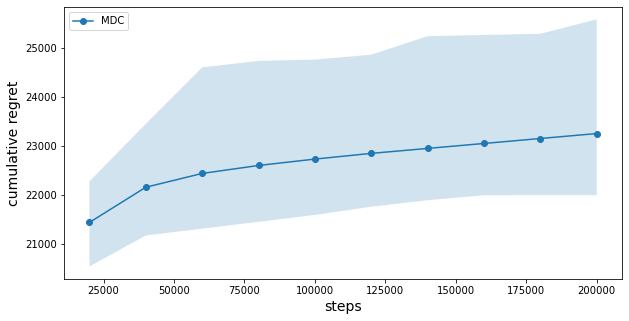

{'mean': {'MDC': array([21435.239     , 22155.19449999, 22437.05299997, 22599.95799996,
       22730.49799994, 22847.14799993, 22948.48299992, 23049.81499991,
       23151.1479999 , 23252.48299989])}, 'low': {'MDC': array([20536.034     , 21168.40299998, 21308.40949996, 21448.40649994,
       21588.40299992, 21756.77149991, 21890.11099989, 21991.40399986,
       21993.69349993, 21993.69349993])}, 'high': {'MDC': array([22275.2255    , 23451.8955    , 24604.44899999, 24737.77899997,
       24764.44899996, 24864.59799992, 25243.34199996, 25267.34199996,
       25291.34199995, 25586.51949985])}}
INFO: Making new env: MatchingSelectionBandit-v0 ({'n_pairs': 5, 'time_series_frequency': 20000})
INFO: Bernoulli parameters: [0.  0.  0.1 0.1 0.2 0.2 0.3 0.3 0.4 0.4]
INFO: ========== Repetition: 1 ==========
INFO: Bernoulli parameters: [0.  0.  0.1 0.1 0.2 0.2 0.3 0.3 0.4 0.4]
INFO: Algorithm: MDC
INFO: Step: 20000, Cumulative Regret: 2222.3299999999454
INFO: Step: 40000, Cumulative Regret: 4444

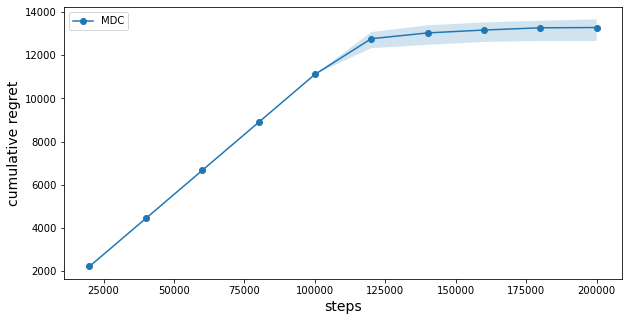

{'mean': {'MDC': array([ 2222.33      ,  4444.52      ,  6666.84      ,  8888.97      ,
       11111.15000001, 12763.55100001, 13031.51550002, 13164.84900002,
       13268.70550002, 13281.09700002])}, 'low': {'MDC': array([ 2222.33      ,  4444.52      ,  6666.84      ,  8888.97      ,
       11111.15000001, 12324.57200001, 12480.36750002, 12613.70700002,
       12656.47800002, 12656.47800002])}, 'high': {'MDC': array([ 2222.33      ,  4444.52      ,  6666.84      ,  8888.97      ,
       11111.15000001, 13071.01500001, 13383.86700002, 13517.19750002,
       13595.75050002, 13659.37100002])}}
------------- Escaped time is 6782.796499490738 seconds -------------


In [4]:
Ns = [11, 5]
Delta = 0.1
horizon = 200000
reps = 20

t = time.time()
for N in Ns:
    p_dist = origin_equal_distance(N, Delta) 
    agents = [MDC(n_pairs=N)]
    results = matching_selection_sim(agents, p_dist, horizon, reps)
    print(results)
        
print('------------- Escaped time is {0} seconds -------------'.format(time.time() - t))

INFO: Making new env: MatchingSelectionBandit-v0 ({'n_pairs': 6, 'time_series_frequency': 20000})
INFO: Bernoulli parameters: [0.  0.  0.1 0.1 0.2 0.2 0.3 0.3 0.4 0.4 0.5 0.5]
INFO: ========== Repetition: 1 ==========
INFO: Bernoulli parameters: [0.  0.  0.1 0.1 0.2 0.2 0.3 0.3 0.4 0.4 0.5 0.5]
INFO: Algorithm: MDC
INFO: Step: 20000, Cumulative Regret: 3818.359999999855
INFO: Step: 40000, Cumulative Regret: 7636.530000000456
INFO: Step: 60000, Cumulative Regret: 11454.810000001118
INFO: Step: 80000, Cumulative Regret: 14065.660000004968
INFO: Step: 100000, Cumulative Regret: 14307.070000010237
INFO: Step: 120000, Cumulative Regret: 14440.400000013147
INFO: Step: 140000, Cumulative Regret: 14490.94000001425
INFO: Step: 160000, Cumulative Regret: 14490.94000001425
INFO: Step: 180000, Cumulative Regret: 14490.94000001425
INFO: Step: 200000, Cumulative Regret: 14490.94000001425
INFO: ========== Repetition: 2 ==========
INFO: Bernoulli parameters: [0.  0.  0.1 0.1 0.2 0.2 0.3 0.3 0.4 0.4 0.

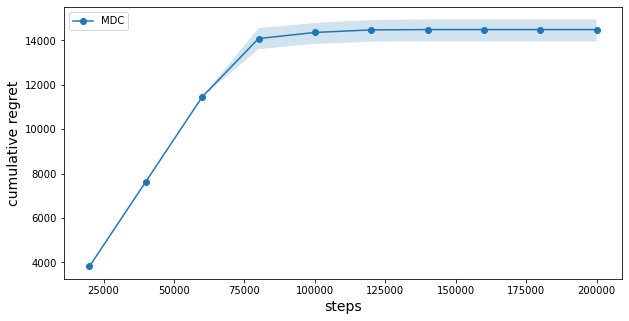

{'mean': {'MDC': array([ 3818.36      ,  7636.53      , 11454.81      , 14082.5425    ,
       14357.99800001, 14474.20600001, 14488.19800001, 14488.19800001,
       14488.19800001, 14488.19800001])}, 'low': {'MDC': array([ 3818.36      ,  7636.53      , 11454.81      , 13602.61900001,
       13846.76100001, 13942.53900002, 13955.66800002, 13955.66800002,
       13955.66800002, 13955.66800002])}, 'high': {'MDC': array([ 3818.36      ,  7636.53      , 11454.81      , 14549.511     ,
       14788.63650001, 14921.97600001, 14948.38100001, 14948.38100001,
       14948.38100001, 14948.38100001])}}
INFO: Making new env: MatchingSelectionBandit-v0 ({'n_pairs': 7, 'time_series_frequency': 20000})
INFO: Bernoulli parameters: [0.  0.  0.1 0.1 0.2 0.2 0.3 0.3 0.4 0.4 0.5 0.5 0.6 0.6]
INFO: ========== Repetition: 1 ==========
INFO: Bernoulli parameters: [0.  0.  0.1 0.1 0.2 0.2 0.3 0.3 0.4 0.4 0.5 0.5 0.6 0.6]
INFO: Algorithm: MDC
INFO: Step: 20000, Cumulative Regret: 6031.010000000129
INFO: Step:

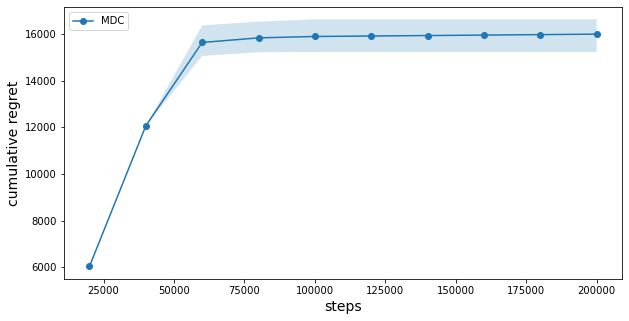

{'mean': {'MDC': array([ 6031.01      , 12061.69      , 15639.02600001, 15835.99850001,
       15896.01000001, 15916.01050001, 15936.01050001, 15956.01000001,
       15976.01050001, 15996.01050001])}, 'low': {'MDC': array([ 6031.01      , 12061.69      , 15061.1635    , 15216.31500001,
       15232.67900001, 15232.67900001, 15232.67900001, 15232.67900001,
       15232.67900001, 15232.67900001])}, 'high': {'MDC': array([ 6031.01      , 12061.69      , 16371.04650001, 16534.72299999,
       16630.49399997, 16630.49399997, 16630.49399997, 16630.49399997,
       16630.49399997, 16630.49399997])}}
INFO: Making new env: MatchingSelectionBandit-v0 ({'n_pairs': 8, 'time_series_frequency': 20000})
INFO: Bernoulli parameters: [0.  0.  0.1 0.1 0.2 0.2 0.3 0.3 0.4 0.4 0.5 0.5 0.6 0.6 0.7 0.7]
INFO: ========== Repetition: 1 ==========
INFO: Bernoulli parameters: [0.  0.  0.1 0.1 0.2 0.2 0.3 0.3 0.4 0.4 0.5 0.5 0.6 0.6 0.7 0.7]
INFO: Algorithm: MDC
INFO: Step: 20000, Cumulative Regret: 8960.60000000

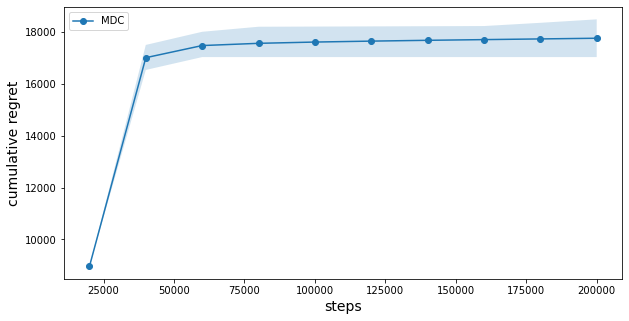

{'mean': {'MDC': array([ 8960.6       , 17009.6705    , 17477.34749999, 17563.43199998,
       17612.40499997, 17648.58549997, 17679.75399996, 17706.41999996,
       17733.08699996, 17759.75399995])}, 'low': {'MDC': array([ 8960.6  , 16537.046, 17033.2  , 17033.2  , 17033.2  , 17033.2  ,
       17033.2  , 17033.2  , 17033.2  , 17033.2  ])}, 'high': {'MDC': array([ 8960.6       , 17501.2       , 18008.28899999, 18202.98449999,
       18209.65099999, 18216.31749998, 18222.98449998, 18229.65099998,
       18354.32649988, 18487.65699986])}}
INFO: Making new env: MatchingSelectionBandit-v0 ({'n_pairs': 9, 'time_series_frequency': 20000})
INFO: Bernoulli parameters: [0.  0.  0.1 0.1 0.2 0.2 0.3 0.3 0.4 0.4 0.5 0.5 0.6 0.6 0.7 0.7 0.8 0.8]
INFO: ========== Repetition: 1 ==========
INFO: Bernoulli parameters: [0.  0.  0.1 0.1 0.2 0.2 0.3 0.3 0.4 0.4 0.5 0.5 0.6 0.6 0.7 0.7 0.8 0.8]
INFO: Algorithm: MDC
INFO: Step: 20000, Cumulative Regret: 12706.440000000559
INFO: Step: 40000, Cumulative Regre

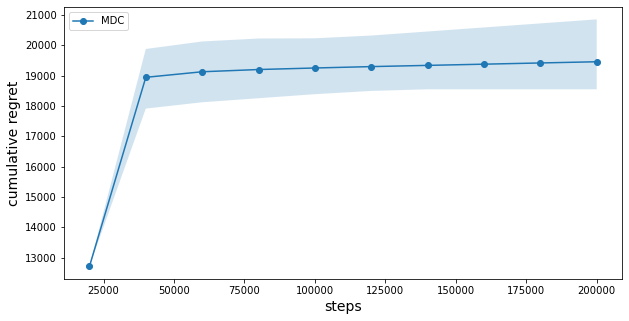

{'mean': {'MDC': array([12706.44      , 18942.894     , 19126.37949998, 19199.92399997,
       19250.74549997, 19296.46899996, 19336.46849995, 19376.46949995,
       19416.46899994, 19456.46849993])}, 'low': {'MDC': array([12706.44      , 17912.36299999, 18120.06149998, 18253.39199996,
       18386.73149994, 18494.13549991, 18548.70349998, 18548.70349998,
       18548.70349998, 18548.70349998])}, 'high': {'MDC': array([12706.44      , 19877.743     , 20125.27349999, 20223.26299999,
       20229.92949999, 20321.14649992, 20454.4764999 , 20587.81599988,
       20721.14649986, 20854.47649983])}}
INFO: Making new env: MatchingSelectionBandit-v0 ({'n_pairs': 10, 'time_series_frequency': 20000})
INFO: Bernoulli parameters: [0.  0.  0.1 0.1 0.2 0.2 0.3 0.3 0.4 0.4 0.5 0.5 0.6 0.6 0.7 0.7 0.8 0.8
 0.9 0.9]
INFO: ========== Repetition: 1 ==========
INFO: Bernoulli parameters: [0.  0.  0.1 0.1 0.2 0.2 0.3 0.3 0.4 0.4 0.5 0.5 0.6 0.6 0.7 0.7 0.8 0.8
 0.9 0.9]
INFO: Algorithm: MDC
INFO: Step: 2000

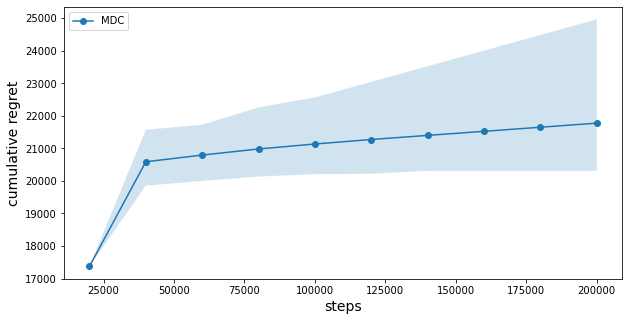

{'mean': {'MDC': array([17370.67      , 20588.4305    , 20795.06149998, 20981.87249997,
       21134.52149995, 21273.03049994, 21399.62349993, 21524.95799992,
       21650.29049991, 21775.6234999 ])}, 'low': {'MDC': array([17370.67      , 19855.9955    , 19996.94199998, 20134.02949995,
       20206.73999999, 20220.18349993, 20308.89449993, 20308.89449993,
       20308.89449993, 20308.89449993])}, 'high': {'MDC': array([17370.67      , 21572.8545    , 21726.688     , 22259.78999999,
       22566.96399995, 23046.96399993, 23526.96399991, 24006.96399989,
       24486.96399987, 24966.96399985])}}
------------- Escaped time is 17898.054503917694 seconds -------------


In [2]:
Ns = [6, 7, 8, 9, 10]
Delta = 0.1
horizon = 200000
reps = 20

t = time.time()
for N in Ns:
    p_dist = origin_equal_distance(N, Delta) 
    agents = [MDC(n_pairs=N)]
    results = matching_selection_sim(agents, p_dist, horizon, reps)
    print(results)
        
print('------------- Escaped time is {0} seconds -------------'.format(time.time() - t))

## 2. `centered_equal_distance`:`MDC` and `ESCB`

regret upper bound:
$$
\mathcal{O}\left(\frac{N^2(\log N)^{2}(\log T)}{\Delta_{\min }}\right)
$$

### parameter setting

$u = [(1-(N-1)\tilde{\Delta})/2, (1-(N-3)\tilde{\Delta})/2 \dots, (1+(N-1)\tilde{\Delta})/2]$

INFO: Making new env: MatchingSelectionBandit-v0 ({'n_pairs': 2, 'time_series_frequency': 20000})
INFO: Bernoulli parameters: [0.45 0.45 0.55 0.55]
INFO: ========== Repetition: 1 ==========
INFO: Bernoulli parameters: [0.45 0.45 0.55 0.55]
INFO: Algorithm: MDC
INFO: Step: 20000, Cumulative Regret: 133.3400000000238
INFO: Step: 40000, Cumulative Regret: 266.66999999990253
INFO: Step: 60000, Cumulative Regret: 339.33999999983644
INFO: Step: 80000, Cumulative Regret: 339.33999999983644
INFO: Step: 100000, Cumulative Regret: 339.33999999983644
INFO: Step: 120000, Cumulative Regret: 339.33999999983644
INFO: Step: 140000, Cumulative Regret: 339.33999999983644
INFO: Step: 160000, Cumulative Regret: 339.33999999983644
INFO: Step: 180000, Cumulative Regret: 339.33999999983644
INFO: Step: 200000, Cumulative Regret: 339.33999999983644
INFO: ========== Repetition: 2 ==========
INFO: Bernoulli parameters: [0.45 0.45 0.55 0.55]
INFO: Algorithm: MDC
INFO: Step: 20000, Cumulative Regret: 133.340000000

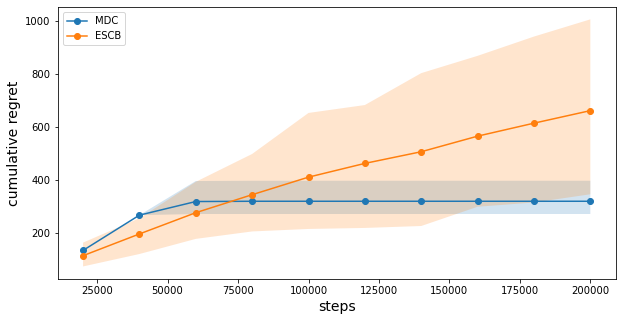

{'mean': {'MDC': array([133.34 , 266.67 , 318.167, 319.208, 319.208, 319.208, 319.208,
       319.208, 319.208, 319.208]), 'ESCB': array([113.3665, 195.532 , 275.9595, 344.0305, 410.4345, 462.4605,
       506.5565, 565.52  , 614.625 , 662.032 ])}, 'low': {'MDC': array([133.34 , 266.67 , 271.018, 271.018, 271.018, 271.018, 271.018,
       271.018, 271.018, 271.018]), 'ESCB': array([ 72.6005, 119.616 , 176.8545, 205.0235, 214.431 , 218.2555,
       225.5905, 298.4255, 314.568 , 345.6075])}, 'high': {'MDC': array([133.34 , 266.67 , 395.744, 396.785, 396.785, 396.785, 396.785,
       396.785, 396.785, 396.785]), 'ESCB': array([ 162.7095,  255.0125,  392.7125,  498.141 ,  653.3045,  683.209 ,
        803.906 ,  869.314 ,  942.229 , 1007.3385])}}
INFO: Making new env: MatchingSelectionBandit-v0 ({'n_pairs': 3, 'time_series_frequency': 20000})
INFO: Bernoulli parameters: [0.4 0.4 0.5 0.5 0.6 0.6]
INFO: ========== Repetition: 1 ==========
INFO: Bernoulli parameters: [0.4 0.4 0.5 0.5 0.6 0.6]
I

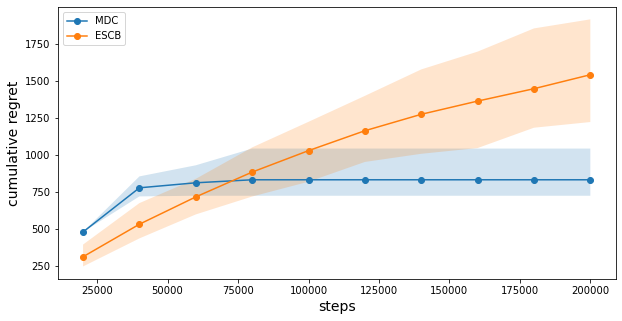

{'mean': {'MDC': array([480.    , 777.74  , 811.5925, 831.927 , 831.927 , 831.927 ,
       831.927 , 831.927 , 831.927 , 831.927 ]), 'ESCB': array([ 312.7635,  532.2175,  716.368 ,  883.764 , 1028.49  , 1162.733 ,
       1273.532 , 1362.6935, 1446.256 , 1540.498 ])}, 'low': {'MDC': array([480.   , 719.877, 724.304, 724.304, 724.304, 724.304, 724.304,
       724.304, 724.304, 724.304]), 'ESCB': array([ 247.346 ,  436.5305,  598.2145,  718.985 ,  818.75  ,  952.195 ,
       1007.197 , 1045.858 , 1183.093 , 1221.415 ])}, 'high': {'MDC': array([ 480.    ,  854.713 ,  929.6005, 1042.421 , 1042.421 , 1042.421 ,
       1042.421 , 1042.421 , 1042.421 , 1042.421 ]), 'ESCB': array([ 394.9185,  674.551 ,  838.209 , 1050.1585, 1222.8705, 1397.8395,
       1576.2115, 1696.3315, 1852.94  , 1913.99  ])}}
INFO: Making new env: MatchingSelectionBandit-v0 ({'n_pairs': 4, 'time_series_frequency': 20000})
INFO: Bernoulli parameters: [0.35 0.35 0.45 0.45 0.55 0.55 0.65 0.65]
INFO: ========== Repetition: 1 

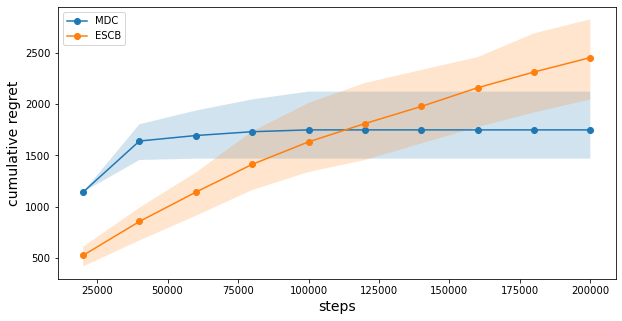

{'mean': {'MDC': array([1142.88  , 1639.7945, 1693.2075, 1730.3735, 1748.086 , 1748.086 ,
       1748.086 , 1748.086 , 1748.086 , 1748.086 ]), 'ESCB': array([ 527.256 ,  856.8385, 1142.2175, 1412.284 , 1631.4915, 1809.4935,
       1975.9875, 2157.9585, 2311.4455, 2451.1765])}, 'low': {'MDC': array([1142.88  , 1454.7265, 1468.397 , 1468.397 , 1468.397 , 1468.397 ,
       1468.397 , 1468.397 , 1468.397 , 1468.397 ]), 'ESCB': array([ 419.5685,  672.338 ,  912.2965, 1162.5485, 1337.93  , 1454.629 ,
       1615.9885, 1775.124 , 1917.2415, 2044.2585])}, 'high': {'MDC': array([1142.88 , 1802.769, 1936.109, 2044.571, 2120.456, 2120.456,
       2120.456, 2120.456, 2120.456, 2120.456]), 'ESCB': array([ 610.7545    ,  991.1595    , 1332.4475    , 1734.15      ,
       2010.378     , 2203.7245    , 2331.329     , 2455.5295    ,
       2686.88650001, 2823.44600001])}}
------------- Escaped time is 16396.10916519165 seconds -------------


In [8]:
Ns = [2, 3, 4]
Delta = 0.1
horizon = 200000
reps = 20

t = time.time()
for N in Ns:
    p_dist = centered_equal_distance(N, Delta)
    agents = [MDC(n_pairs=N), ESCB(n_pairs=N)]
    results = matching_selection_sim(agents, p_dist, horizon, reps)
    print(results)
        
print('------------- Escaped time is {0} seconds -------------'.format(time.time() - t))

## 3. `centered_equal_distance`: `MDC`

INFO: Making new env: MatchingSelectionBandit-v0 ({'n_pairs': 5, 'time_series_frequency': 20000})
INFO: Bernoulli parameters: [0.3 0.3 0.4 0.4 0.5 0.5 0.6 0.6 0.7 0.7]
INFO: ========== Repetition: 1 ==========
INFO: Bernoulli parameters: [0.3 0.3 0.4 0.4 0.5 0.5 0.6 0.6 0.7 0.7]
INFO: Algorithm: MDC
INFO: Step: 20000, Cumulative Regret: 2222.3299999999454
INFO: Step: 40000, Cumulative Regret: 2984.300000002144
INFO: Step: 60000, Cumulative Regret: 3032.280000003191
INFO: Step: 80000, Cumulative Regret: 3032.280000003191
INFO: Step: 100000, Cumulative Regret: 3032.280000003191
INFO: Step: 120000, Cumulative Regret: 3032.280000003191
INFO: Step: 140000, Cumulative Regret: 3032.280000003191
INFO: Step: 160000, Cumulative Regret: 3032.280000003191
INFO: Step: 180000, Cumulative Regret: 3032.280000003191
INFO: Step: 200000, Cumulative Regret: 3032.280000003191
INFO: ========== Repetition: 2 ==========
INFO: Bernoulli parameters: [0.3 0.3 0.4 0.4 0.5 0.5 0.6 0.6 0.7 0.7]
INFO: Algorithm: MDC

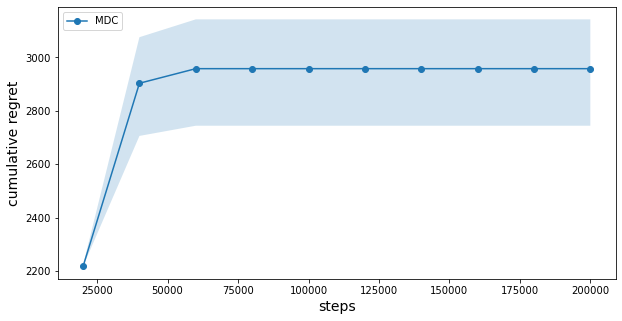

{'mean': {'MDC': array([2217.3685, 2903.169 , 2957.776 , 2957.776 , 2957.776 , 2957.776 ,
       2957.776 , 2957.776 , 2957.776 , 2957.776 ])}, 'low': {'MDC': array([2217.3685, 2705.9895, 2744.182 , 2744.182 , 2744.182 , 2744.182 ,
       2744.182 , 2744.182 , 2744.182 , 2744.182 ])}, 'high': {'MDC': array([2222.33  , 3075.5335, 3142.37  , 3142.37  , 3142.37  , 3142.37  ,
       3142.37  , 3142.37  , 3142.37  , 3142.37  ])}}
INFO: Making new env: MatchingSelectionBandit-v0 ({'n_pairs': 6, 'time_series_frequency': 20000})
INFO: Bernoulli parameters: [0.25 0.25 0.35 0.35 0.45 0.45 0.55 0.55 0.65 0.65 0.75 0.75]
INFO: ========== Repetition: 1 ==========
INFO: Bernoulli parameters: [0.25 0.25 0.35 0.35 0.45 0.45 0.55 0.55 0.65 0.65 0.75 0.75]
INFO: Algorithm: MDC
INFO: Step: 20000, Cumulative Regret: 3528.599999999988
INFO: Step: 40000, Cumulative Regret: 4153.85000000285
INFO: Step: 60000, Cumulative Regret: 4317.260000006417
INFO: Step: 80000, Cumulative Regret: 4317.260000006417
INFO: S

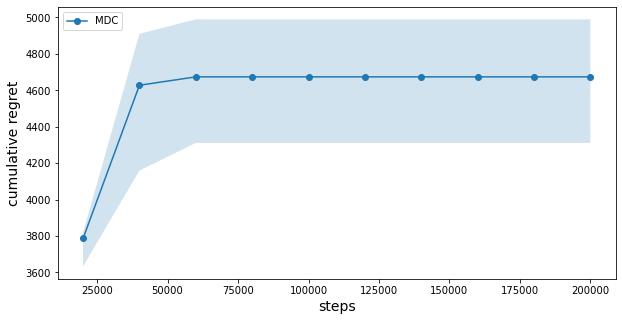

{'mean': {'MDC': array([3786.35  , 4627.8985, 4673.9035, 4673.9035, 4673.9035, 4673.9035,
       4673.9035, 4673.9035, 4673.9035, 4673.9035])}, 'low': {'MDC': array([3632.7675    , 4159.246     , 4311.05600001, 4311.05600001,
       4311.05600001, 4311.05600001, 4311.05600001, 4311.05600001,
       4311.05600001, 4311.05600001])}, 'high': {'MDC': array([3818.36  , 4910.3385, 4989.757 , 4989.757 , 4989.757 , 4989.757 ,
       4989.757 , 4989.757 , 4989.757 , 4989.757 ])}}
INFO: Making new env: MatchingSelectionBandit-v0 ({'n_pairs': 7, 'time_series_frequency': 20000})
INFO: Bernoulli parameters: [0.2 0.2 0.3 0.3 0.4 0.4 0.5 0.5 0.6 0.6 0.7 0.7 0.8 0.8]
INFO: ========== Repetition: 1 ==========
INFO: Bernoulli parameters: [0.2 0.2 0.3 0.3 0.4 0.4 0.5 0.5 0.6 0.6 0.7 0.7 0.8 0.8]
INFO: Algorithm: MDC
INFO: Step: 20000, Cumulative Regret: 5998.730000000137
INFO: Step: 40000, Cumulative Regret: 6724.770000001569
INFO: Step: 60000, Cumulative Regret: 6744.000000001989
INFO: Step: 80000, Cumu

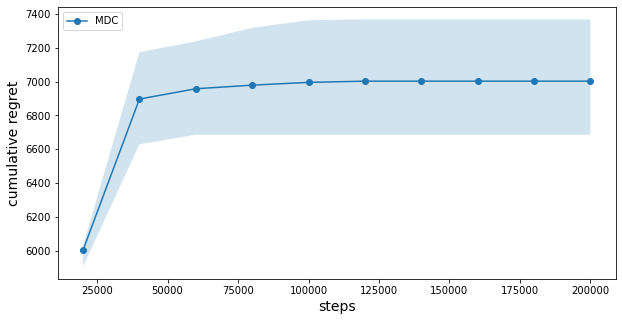

{'mean': {'MDC': array([6005.0255, 6896.5915, 6957.257 , 6978.562 , 6995.0135, 7002.1405,
       7002.1405, 7002.1405, 7002.1405, 7002.1405])}, 'low': {'MDC': array([5907.8395    , 6628.9355    , 6685.95450001, 6685.95450001,
       6685.95450001, 6685.95450001, 6685.95450001, 6685.95450001,
       6685.95450001, 6685.95450001])}, 'high': {'MDC': array([6031.01      , 7173.4845    , 7237.00900001, 7317.36000001,
       7362.187     , 7367.192     , 7367.192     , 7367.192     ,
       7367.192     , 7367.192     ])}}
INFO: Making new env: MatchingSelectionBandit-v0 ({'n_pairs': 8, 'time_series_frequency': 20000})
INFO: Bernoulli parameters: [0.15 0.15 0.25 0.25 0.35 0.35 0.45 0.45 0.55 0.55 0.65 0.65 0.75 0.75
 0.85 0.85]
INFO: ========== Repetition: 1 ==========
INFO: Bernoulli parameters: [0.15 0.15 0.25 0.25 0.35 0.35 0.45 0.45 0.55 0.55 0.65 0.65 0.75 0.75
 0.85 0.85]
INFO: Algorithm: MDC
INFO: Step: 20000, Cumulative Regret: 8960.60000000068
INFO: Step: 40000, Cumulative Regret: 9

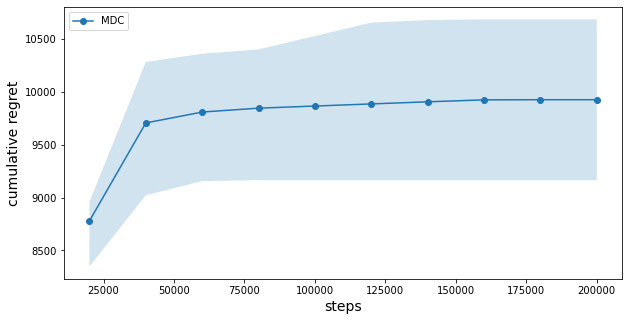

{'mean': {'MDC': array([8779.388     , 9706.81450001, 9809.79400001, 9846.73700001,
       9866.73650001, 9886.73600001, 9906.73700001, 9925.16600001,
       9926.64700001, 9926.64700001])}, 'low': {'MDC': array([8348.767     , 9022.3455    , 9156.23450001, 9165.14300001,
       9165.14300001, 9165.14300001, 9165.14300001, 9165.14300001,
       9165.14300001, 9165.14300001])}, 'high': {'MDC': array([ 8960.6       , 10284.01450001, 10361.55600001, 10402.65100001,
       10529.31450002, 10655.97800002, 10680.24900002, 10686.91550002,
       10687.07700002, 10687.07700002])}}
------------- Escaped time is 10193.273148298264 seconds -------------


In [2]:
Ns = [5, 6, 7, 8]
Delta = 0.1
horizon = 200000
reps = 20

t = time.time()
for N in Ns:
    p_dist = centered_equal_distance(N, Delta)
    agents = [MDC(n_pairs=N)]
    results = matching_selection_sim(agents, p_dist, horizon, reps)
    print(results)
        
print('------------- Escaped time is {0} seconds -------------'.format(time.time() - t))

INFO: Making new env: MatchingSelectionBandit-v0 ({'n_pairs': 9, 'time_series_frequency': 20000})
INFO: Bernoulli parameters: [0.1 0.1 0.2 0.2 0.3 0.3 0.4 0.4 0.5 0.5 0.6 0.6 0.7 0.7 0.8 0.8 0.9 0.9]
INFO: ========== Repetition: 1 ==========
INFO: Bernoulli parameters: [0.1 0.1 0.2 0.2 0.3 0.3 0.4 0.4 0.5 0.5 0.6 0.6 0.7 0.7 0.8 0.8 0.9 0.9]
INFO: Algorithm: MDC
INFO: Step: 20000, Cumulative Regret: 12468.970000000541
INFO: Step: 40000, Cumulative Regret: 12847.250000002368
INFO: Step: 60000, Cumulative Regret: 12847.250000002368
INFO: Step: 80000, Cumulative Regret: 12847.250000002368
INFO: Step: 100000, Cumulative Regret: 12847.250000002368
INFO: Step: 120000, Cumulative Regret: 12847.250000002368
INFO: Step: 140000, Cumulative Regret: 12847.250000002368
INFO: Step: 160000, Cumulative Regret: 12847.250000002368
INFO: Step: 180000, Cumulative Regret: 12847.250000002368
INFO: Step: 200000, Cumulative Regret: 12847.250000002368
INFO: ========== Repetition: 2 ==========
INFO: Bernoulli p

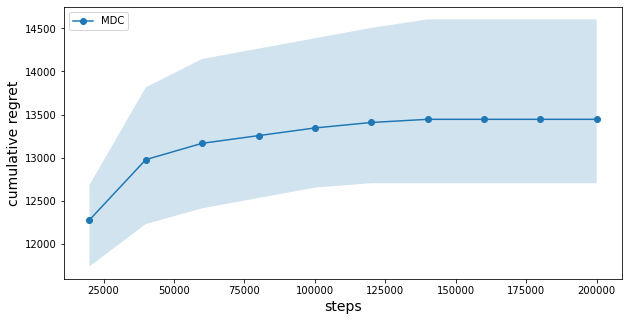

{'mean': {'MDC': array([12277.62333333, 12977.56666667, 13166.89666668, 13255.79000001,
       13344.67666668, 13408.17000001, 13444.89666668, 13444.89666668,
       13444.89666668, 13444.89666668])}, 'low': {'MDC': array([11738.611     , 12230.17400001, 12412.52300001, 12532.52900002,
       12652.52600002, 12703.96100002, 12703.96100002, 12703.96100002,
       12703.96100002, 12703.96100002])}, 'high': {'MDC': array([12682.693     , 13816.181     , 14145.02300001, 14265.02900001,
       14385.02600002, 14505.02300002, 14604.18500002, 14604.18500002,
       14604.18500002, 14604.18500002])}}
INFO: Making new env: MatchingSelectionBandit-v0 ({'n_pairs': 10, 'time_series_frequency': 20000})
INFO: Bernoulli parameters: [0.05 0.05 0.15 0.15 0.25 0.25 0.35 0.35 0.45 0.45 0.55 0.55 0.65 0.65
 0.75 0.75 0.85 0.85 0.95 0.95]
INFO: ========== Repetition: 1 ==========
INFO: Bernoulli parameters: [0.05 0.05 0.15 0.15 0.25 0.25 0.35 0.35 0.45 0.45 0.55 0.55 0.65 0.65
 0.75 0.75 0.85 0.85 0.95 0.9

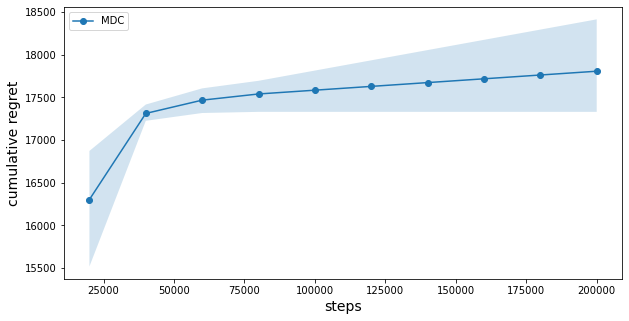

{'mean': {'MDC': array([16303.59333333, 17312.32333332, 17467.83666665, 17540.19333331,
       17584.63666663, 17629.07999996, 17673.52666662, 17717.96999994,
       17762.41333327, 17806.85999993])}, 'low': {'MDC': array([15519.407     , 17225.89699999, 17317.28299998, 17330.61999999,
       17330.61999999, 17330.61999999, 17330.61999999, 17330.61999999,
       17330.61999999, 17330.61999999])}, 'high': {'MDC': array([16872.665     , 17416.61599999, 17605.82299998, 17694.48999995,
       17814.48699993, 17934.48399992, 18054.4899999 , 18174.48699988,
       18294.48399986, 18414.48999984])}}


AssertionError: 

In [7]:
Ns = [9, 10]
Delta = 0.1
horizon = 200000
reps = 3

t = time.time()
for N in Ns:
    p_dist = centered_equal_distance(N, Delta)
    agents = [MDC(n_pairs=N)]
    results = matching_selection_sim(agents, p_dist, horizon, reps)
    print(results)
        
print('------------- Escaped time is {0} seconds -------------'.format(time.time() - t))

## `linear spaced`: `ESCB`

INFO: Making new env: MatchingSelectionBandit-v0 ({'n_pairs': 2, 'time_series_frequency': 200000})
INFO: Bernoulli parameters: [0. 0. 1. 1.]
INFO: ========== Repetition: 1 ==========
INFO: Bernoulli parameters: [0. 0. 1. 1.]
INFO: Algorithm: ESCB
INFO: Step: 200000, Cumulative Regret: 26.0
INFO: Step: 400000, Cumulative Regret: 26.0
INFO: Step: 600000, Cumulative Regret: 28.0
INFO: Step: 800000, Cumulative Regret: 28.0
INFO: Step: 1000000, Cumulative Regret: 28.0
INFO: Step: 1200000, Cumulative Regret: 28.0
INFO: Step: 1400000, Cumulative Regret: 30.0
INFO: Step: 1600000, Cumulative Regret: 30.0
INFO: Step: 1800000, Cumulative Regret: 30.0
INFO: Step: 2000000, Cumulative Regret: 30.0
INFO: ========== Repetition: 2 ==========
INFO: Bernoulli parameters: [0. 0. 1. 1.]
INFO: Algorithm: ESCB
INFO: Step: 200000, Cumulative Regret: 26.0
INFO: Step: 400000, Cumulative Regret: 26.0
INFO: Step: 600000, Cumulative Regret: 28.0
INFO: Step: 800000, Cumulative Regret: 28.0
INFO: Step: 1000000, Cumu

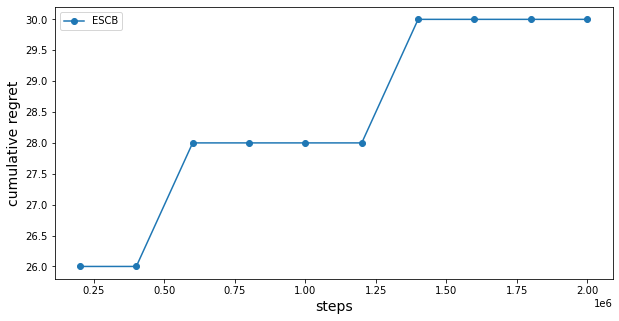

{'mean': {'ESCB': array([26., 26., 28., 28., 28., 28., 30., 30., 30., 30.])}, 'low': {'ESCB': array([26., 26., 28., 28., 28., 28., 30., 30., 30., 30.])}, 'high': {'ESCB': array([26., 26., 28., 28., 28., 28., 30., 30., 30., 30.])}}
INFO: Making new env: MatchingSelectionBandit-v0 ({'n_pairs': 3, 'time_series_frequency': 200000})
INFO: Bernoulli parameters: [0.  0.  0.5 0.5 1.  1. ]
INFO: ========== Repetition: 1 ==========
INFO: Bernoulli parameters: [0.  0.  0.5 0.5 1.  1. ]
INFO: Algorithm: ESCB
INFO: Step: 200000, Cumulative Regret: 182.75
INFO: Step: 400000, Cumulative Regret: 199.25
INFO: Step: 600000, Cumulative Regret: 210.75
INFO: Step: 800000, Cumulative Regret: 214.75
INFO: Step: 1000000, Cumulative Regret: 219.25
INFO: Step: 1200000, Cumulative Regret: 221.5
INFO: Step: 1400000, Cumulative Regret: 222.5
INFO: Step: 1600000, Cumulative Regret: 224.25
INFO: Step: 1800000, Cumulative Regret: 226.0
INFO: Step: 2000000, Cumulative Regret: 227.0
INFO: ========== Repetition: 2 =====

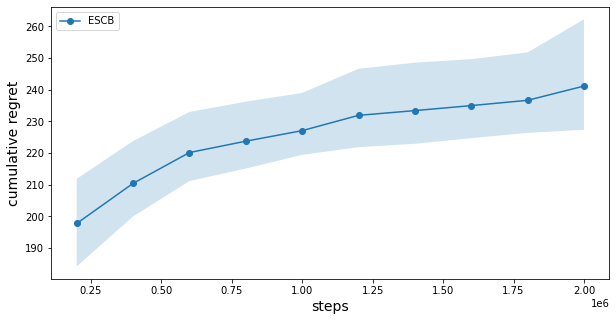

{'mean': {'ESCB': array([197.75      , 210.41666667, 220.16666667, 223.75      ,
       227.08333333, 231.91666667, 233.41666667, 235.        ,
       236.66666667, 241.16666667])}, 'low': {'ESCB': array([184.175, 199.95 , 211.15 , 215.1  , 219.425, 221.875, 222.925,
       224.7  , 226.375, 227.375])}, 'high': {'ESCB': array([211.85 , 223.8  , 232.975, 236.25 , 239.   , 246.625, 248.575,
       249.675, 251.8  , 262.25 ])}}
INFO: Making new env: MatchingSelectionBandit-v0 ({'n_pairs': 4, 'time_series_frequency': 200000})
INFO: Bernoulli parameters: [0.         0.         0.33333333 0.33333333 0.66666667 0.66666667
 1.         1.        ]
INFO: ========== Repetition: 1 ==========
INFO: Bernoulli parameters: [0.         0.         0.33333333 0.33333333 0.66666667 0.66666667
 1.         1.        ]
INFO: Algorithm: ESCB
INFO: Step: 200000, Cumulative Regret: 634.4444444443775
INFO: Step: 400000, Cumulative Regret: 688.555555555479
INFO: Step: 600000, Cumulative Regret: 775.2222222221329


KeyboardInterrupt: 

In [10]:
Ns = [2, 3, 4]
horizon = 2000000
reps = 3

t = time.time()
for N in Ns:
    p_dist = linear_spaced(N)
    agents = [ESCB(n_pairs=N)]
    results = matching_selection_sim(agents, p_dist, horizon, reps)
    print(results)
        
print('------------- Escaped time is {0} seconds -------------'.format(time.time() - t))

## `linear spaced`: `MDC`

In [ ]:
Ns = [2, 3, 4, 5, 6, 7]
horizon = 200000
reps = 3

t = time.time()
for N in Ns:
    p_dist = linear_spaced(N)
    agents = [MDC(n_pairs=N)]
    results = matching_selection_sim(agents, p_dist, horizon, reps)
    print(results)
        
print('------------- Escaped time is {0} seconds -------------'.format(time.time() - t))

## `uncentered equal distance`: `SAM`

INFO: Making new env: MatchingSelectionBandit-v0 ({'n_pairs': 4, 'time_series_frequency': 20000})
INFO: Bernoulli parameters: [0.45 0.45 0.55 0.55 0.65 0.65 0.75 0.75]
INFO: ========== Repetition: 1 ==========
INFO: Bernoulli parameters: [0.45 0.45 0.55 0.55 0.65 0.65 0.75 0.75]
INFO: Algorithm: MDC
INFO: Step: 20000, Cumulative Regret: 980.6799999999229
INFO: Step: 40000, Cumulative Regret: 1127.1799999997897
INFO: Step: 60000, Cumulative Regret: 1127.1799999997897
INFO: Step: 80000, Cumulative Regret: 1127.1799999997897
INFO: Step: 100000, Cumulative Regret: 1127.1799999997897
INFO: Step: 120000, Cumulative Regret: 1127.1799999997897
INFO: Step: 140000, Cumulative Regret: 1127.1799999997897
INFO: Step: 160000, Cumulative Regret: 1127.1799999997897
INFO: Step: 180000, Cumulative Regret: 1127.1799999997897
INFO: Step: 200000, Cumulative Regret: 1127.1799999997897
INFO: ========== Repetition: 2 ==========
INFO: Bernoulli parameters: [0.45 0.45 0.55 0.55 0.65 0.65 0.75 0.75]
INFO: Algori

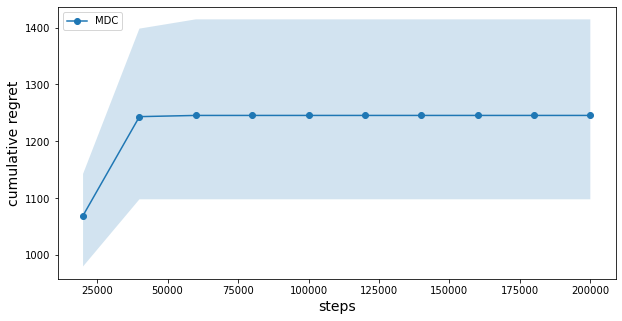

{'mean': {'MDC': array([1069.7935, 1243.453 , 1245.586 , 1245.586 , 1245.586 , 1245.586 ,
       1245.586 , 1245.586 , 1245.586 , 1245.586 ])}, 'low': {'MDC': array([ 980.354, 1098.28 , 1098.28 , 1098.28 , 1098.28 , 1098.28 ,
       1098.28 , 1098.28 , 1098.28 , 1098.28 ])}, 'high': {'MDC': array([1142.88 , 1398.063, 1414.321, 1414.321, 1414.321, 1414.321,
       1414.321, 1414.321, 1414.321, 1414.321])}}
INFO: Making new env: MatchingSelectionBandit-v0 ({'n_pairs': 4, 'time_series_frequency': 20000})
INFO: Bernoulli parameters: [0.55 0.55 0.65 0.65 0.75 0.75 0.85 0.85]
INFO: ========== Repetition: 1 ==========
INFO: Bernoulli parameters: [0.55 0.55 0.65 0.65 0.75 0.75 0.85 0.85]
INFO: Algorithm: MDC
INFO: Step: 20000, Cumulative Regret: 896.7099999999551
INFO: Step: 40000, Cumulative Regret: 964.2599999998937
INFO: Step: 60000, Cumulative Regret: 964.2599999998937
INFO: Step: 80000, Cumulative Regret: 964.2599999998937
INFO: Step: 100000, Cumulative Regret: 964.2599999998937
INFO: Ste

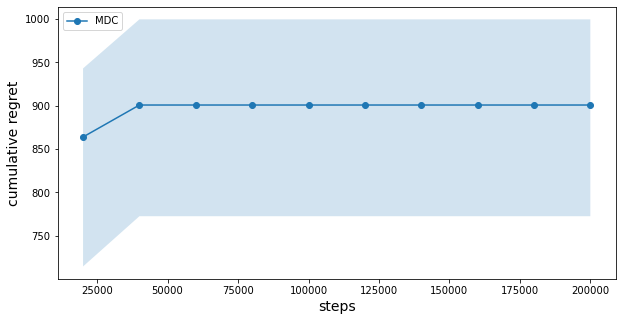

{'mean': {'MDC': array([863.8945, 900.793 , 900.793 , 900.793 , 900.793 , 900.793 ,
       900.793 , 900.793 , 900.793 , 900.793 ])}, 'low': {'MDC': array([714.4575, 772.448 , 772.448 , 772.448 , 772.448 , 772.448 ,
       772.448 , 772.448 , 772.448 , 772.448 ])}, 'high': {'MDC': array([943.072, 999.676, 999.676, 999.676, 999.676, 999.676, 999.676,
       999.676, 999.676, 999.676])}}
INFO: Making new env: MatchingSelectionBandit-v0 ({'n_pairs': 4, 'time_series_frequency': 20000})
INFO: Bernoulli parameters: [0.65 0.65 0.75 0.75 0.85 0.85 0.95 0.95]
INFO: ========== Repetition: 1 ==========
INFO: Bernoulli parameters: [0.65 0.65 0.75 0.75 0.85 0.85 0.95 0.95]
INFO: Algorithm: MDC
INFO: Step: 20000, Cumulative Regret: 653.5099999998835
INFO: Step: 40000, Cumulative Regret: 684.0599999998557
INFO: Step: 60000, Cumulative Regret: 684.0599999998557
INFO: Step: 80000, Cumulative Regret: 684.0599999998557
INFO: Step: 100000, Cumulative Regret: 684.0599999998557
INFO: Step: 120000, Cumulativ

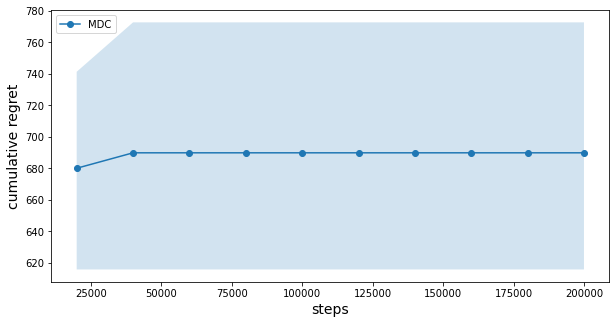

{'mean': {'MDC': array([679.872, 689.678, 689.678, 689.678, 689.678, 689.678, 689.678,
       689.678, 689.678, 689.678])}, 'low': {'MDC': array([615.617, 615.617, 615.617, 615.617, 615.617, 615.617, 615.617,
       615.617, 615.617, 615.617])}, 'high': {'MDC': array([741.1325, 772.516 , 772.516 , 772.516 , 772.516 , 772.516 ,
       772.516 , 772.516 , 772.516 , 772.516 ])}}
------------- Escaped time is 5500.7009699344635 seconds -------------


In [2]:
all_mu = [0.6, 0.7, 0.8]
N = 4
Delta = 0.1
horizon = 200000
reps = 20

t = time.time()
for mu in all_mu:
    p_dist = uncentered_equal_distance(N, mu, Delta)
    agents = [MDC(n_pairs=N)]
    results = matching_selection_sim(agents, p_dist, horizon, reps)
    print(results)
        
print('------------- Escaped time is {0} seconds -------------'.format(time.time() - t))

## `uncentered equal distance`: `ESCB`

INFO: Making new env: MatchingSelectionBandit-v0 ({'n_pairs': 4, 'time_series_frequency': 20000})
INFO: Bernoulli parameters: [0.45 0.45 0.55 0.55 0.65 0.65 0.75 0.75]
INFO: ========== Repetition: 1 ==========
INFO: Bernoulli parameters: [0.45 0.45 0.55 0.55 0.65 0.65 0.75 0.75]
INFO: Algorithm: ESCB
INFO: Step: 20000, Cumulative Regret: 502.94999999984424
INFO: Step: 40000, Cumulative Regret: 790.2399999996152
INFO: Step: 60000, Cumulative Regret: 1033.589999999397
INFO: Step: 80000, Cumulative Regret: 1239.5399999992096
INFO: Step: 100000, Cumulative Regret: 1463.489999999006
INFO: Step: 120000, Cumulative Regret: 1565.2299999989134
INFO: Step: 140000, Cumulative Regret: 1641.2899999988442
INFO: Step: 160000, Cumulative Regret: 1721.879999998771
INFO: Step: 180000, Cumulative Regret: 1998.819999998519
INFO: Step: 200000, Cumulative Regret: 2071.669999998638
INFO: ========== Repetition: 2 ==========
INFO: Bernoulli parameters: [0.45 0.45 0.55 0.55 0.65 0.65 0.75 0.75]
INFO: Algorithm:

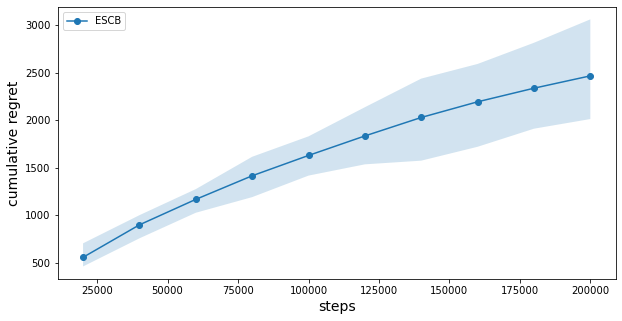

{'mean': {'ESCB': array([ 557.538 ,  898.892 , 1166.7695, 1414.8615, 1628.6665, 1833.8565,
       2028.1065, 2192.8795, 2335.8505, 2465.6455])}, 'low': {'ESCB': array([ 461.4185,  757.0375, 1026.0785, 1190.3595, 1416.754 , 1535.1735,
       1573.883 , 1719.9255, 1910.056 , 2011.515 ])}, 'high': {'ESCB': array([ 704.526     , 1000.4085    , 1274.643     , 1614.6595    ,
       1829.4495    , 2135.9205    , 2436.844     , 2590.90000001,
       2813.55150001, 3059.89100001])}}
INFO: Making new env: MatchingSelectionBandit-v0 ({'n_pairs': 4, 'time_series_frequency': 20000})
INFO: Bernoulli parameters: [0.55 0.55 0.65 0.65 0.75 0.75 0.85 0.85]
INFO: ========== Repetition: 1 ==========
INFO: Bernoulli parameters: [0.55 0.55 0.65 0.65 0.75 0.75 0.85 0.85]
INFO: Algorithm: ESCB
INFO: Step: 20000, Cumulative Regret: 561.7699999998393
INFO: Step: 40000, Cumulative Regret: 828.1299999996589
INFO: Step: 60000, Cumulative Regret: 1106.6899999994127
INFO: Step: 80000, Cumulative Regret: 1455.1899999

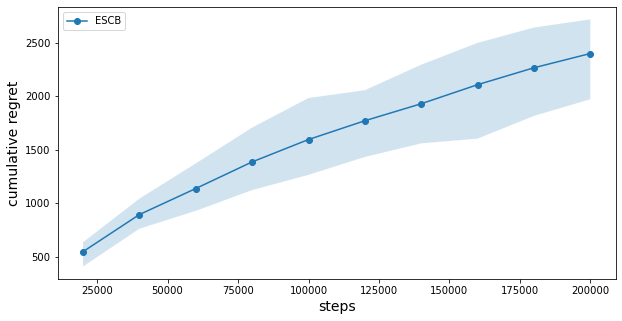

{'mean': {'ESCB': array([ 547.9185,  894.326 , 1137.6   , 1386.188 , 1595.034 , 1770.6785,
       1929.437 , 2107.436 , 2265.423 , 2398.498 ])}, 'low': {'ESCB': array([ 409.58  ,  761.81  ,  928.955 , 1122.901 , 1265.401 , 1432.3085,
       1559.085 , 1603.5325, 1815.7715, 1970.994 ])}, 'high': {'ESCB': array([ 635.559     , 1042.9185    , 1372.0105    , 1706.6925    ,
       1982.7925    , 2055.797     , 2294.381     , 2498.099     ,
       2641.07650001, 2717.55000001])}}
INFO: Making new env: MatchingSelectionBandit-v0 ({'n_pairs': 4, 'time_series_frequency': 20000})
INFO: Bernoulli parameters: [0.65 0.65 0.75 0.75 0.85 0.85 0.95 0.95]
INFO: ========== Repetition: 1 ==========
INFO: Bernoulli parameters: [0.65 0.65 0.75 0.75 0.85 0.85 0.95 0.95]
INFO: Algorithm: ESCB
INFO: Step: 20000, Cumulative Regret: 701.7099999997265
INFO: Step: 40000, Cumulative Regret: 1143.179999999325
INFO: Step: 60000, Cumulative Regret: 1664.5399999988508
INFO: Step: 80000, Cumulative Regret: 1845.0799999

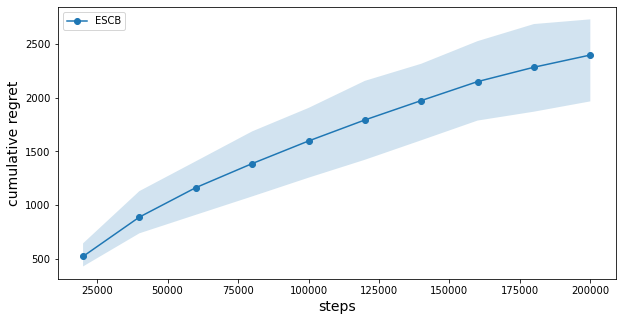

{'mean': {'ESCB': array([ 523.693 ,  889.5985, 1163.143 , 1386.795 , 1596.9145, 1792.5635,
       1972.7115, 2149.2245, 2282.916 , 2396.269 ])}, 'low': {'ESCB': array([ 430.3075,  738.479 ,  910.304 , 1081.375 , 1255.53  , 1422.278 ,
       1603.4985, 1786.9705, 1869.573 , 1965.217 ])}, 'high': {'ESCB': array([ 644.976     , 1131.1245    , 1408.0495    , 1686.183     ,
       1904.281     , 2156.18      , 2315.084     , 2525.51150001,
       2684.49350001, 2727.99350001])}}
------------- Escaped time is 33476.713056087494 seconds -------------


In [3]:
all_mu = [0.6, 0.7, 0.8]
N = 4
Delta = 0.1
horizon = 200000
reps = 20

t = time.time()
for mu in all_mu:
    p_dist = uncentered_equal_distance(N, mu, Delta)
    agents = [ESCB(n_pairs=N)]
    results = matching_selection_sim(agents, p_dist, horizon, reps)
    print(results)
        
print('------------- Escaped time is {0} seconds -------------'.format(time.time() - t))